# House Price

## import Libraries & Load Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('house_price.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3470,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3471,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3472,75,2,False,False,False,Parand,3.650000e+08,12166.67
3473,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [40]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475 entries, 0 to 3474
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3475 non-null   int64  
 1   Room        3475 non-null   int64  
 2   Parking     3475 non-null   bool   
 3   Warehouse   3475 non-null   bool   
 4   Elevator    3475 non-null   bool   
 5   Address     3452 non-null   object 
 6   Price       3475 non-null   float64
 7   Price(USD)  3475 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.1+ KB


# Expolratory Data Analysis - EDA

In [42]:
df.describe()

,Area,Room,Price,Price(USD)
count,3475.000000,3475.000000,3.475000e+03,3.475000e+03
mean,108.036835,2.079712,5.356351e+09,1.785450e+05
std,92.463177,0.758547,8.102111e+09,2.700704e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.416250e+09,4.720833e+04
50%,90.000000,2.000000,2.891700e+09,9.639000e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,3600.000000,5.000000,9.240000e+10,3.080000e+06


In [43]:
df.describe(include='object')

,Address
count,3452
unique,192
top,Punak
freq,161


In [44]:
# sns.pairplot(df)

array([[<Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Room', ylabel='Area'>,
        <Axes: xlabel='Price', ylabel='Area'>,
        <Axes: xlabel='Price(USD)', ylabel='Area'>],
       [<Axes: xlabel='Area', ylabel='Room'>,
        <Axes: xlabel='Room', ylabel='Room'>,
        <Axes: xlabel='Price', ylabel='Room'>,
        <Axes: xlabel='Price(USD)', ylabel='Room'>],
       [<Axes: xlabel='Area', ylabel='Price'>,
        <Axes: xlabel='Room', ylabel='Price'>,
        <Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Price(USD)', ylabel='Price'>],
       [<Axes: xlabel='Area', ylabel='Price(USD)'>,
        <Axes: xlabel='Room', ylabel='Price(USD)'>,
        <Axes: xlabel='Price', ylabel='Price(USD)'>,
        <Axes: xlabel='Price(USD)', ylabel='Price(USD)'>]], dtype=object)

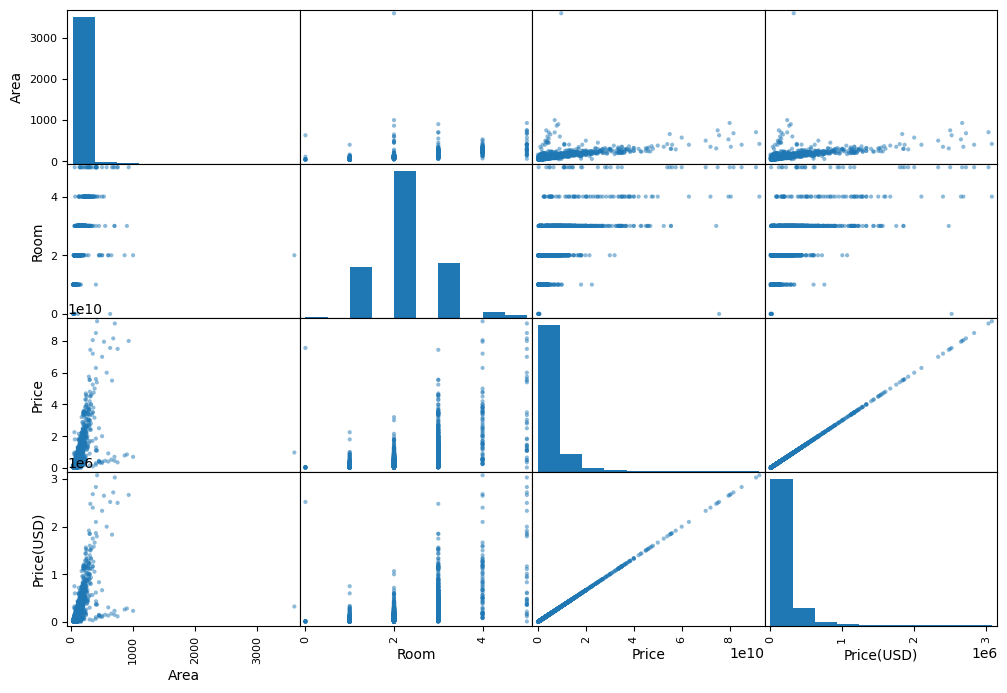

In [76]:
from pandas.plotting import scatter_matrix
numerical_columns = ['Area', 'Room', 'Price', 'Price(USD)']

scatter_matrix(df[numerical_columns], figsize=(12, 8))

In [45]:
# print(df['Address'].unique())

## Data cleaning

In [46]:
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(208)

In [48]:
# delete columns with more than 90% missing values
df.drop(df.columns[df.isna().sum()/len(df) >= 0.9] , axis = 1)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3470,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3471,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3472,75,2,False,False,False,Parand,3.650000e+08,12166.67
3473,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [49]:
# delete rows with more than 80% missing values
from math import ceil
df_cleaned = df.dropna(thresh= ceil(0.8 * len(df.columns)))
dropped_rows = df[~df.index.isin(df_cleaned.index)]
print(dropped_rows)

Empty DataFrame
Columns: [Area, Room, Parking, Warehouse, Elevator, Address, Price, Price(USD)]
Index: []


In [50]:
cleaned_df = df.drop_duplicates(keep='first')
dropped_row = df[~df.index.isin(cleaned_df.index)]
print(dropped_row)

      Area  Room  Parking  Warehouse  Elevator            Address  \
55      61     1     True       True     False              Punak   
78      74     2     True       True      True            Amirieh   
79      88     3    False      False      True             Parand   
80      63     1     True       True      True              Punak   
81     114     3     True       True      True         Sattarkhan   
...    ...   ...      ...        ...       ...                ...   
3445    80     2     True       True      True              Punak   
3447    88     2     True       True      True  Central Janatabad   
3455    80     2     True       True      True        Ostad Moein   
3457    55     1     True       True      True              Punak   
3472    75     2    False      False     False             Parand   

             Price  Price(USD)  
55    2.030000e+09    67666.67  
78    1.700000e+09    56666.67  
79    5.600000e+08    18666.67  
80    2.150000e+09    71666.67  
81    

In [ ]:
cleaned_df = cleaned_df.drop(columns='Price')

In [53]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 0 to 3474
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3452 non-null   int64  
 1   Room        3452 non-null   int64  
 2   Parking     3452 non-null   bool   
 3   Warehouse   3452 non-null   bool   
 4   Elevator    3452 non-null   bool   
 5   Address     3452 non-null   object 
 6   Price(USD)  3452 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 145.0+ KB


### correlation middle numerical column

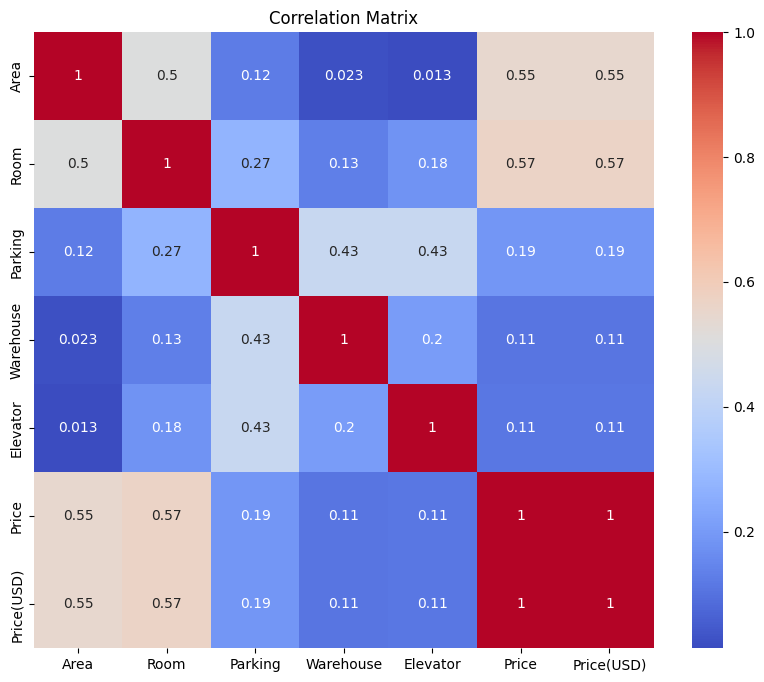

In [54]:
correlation_matrix_pearson = df_cleaned[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price', 'Price(USD)']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


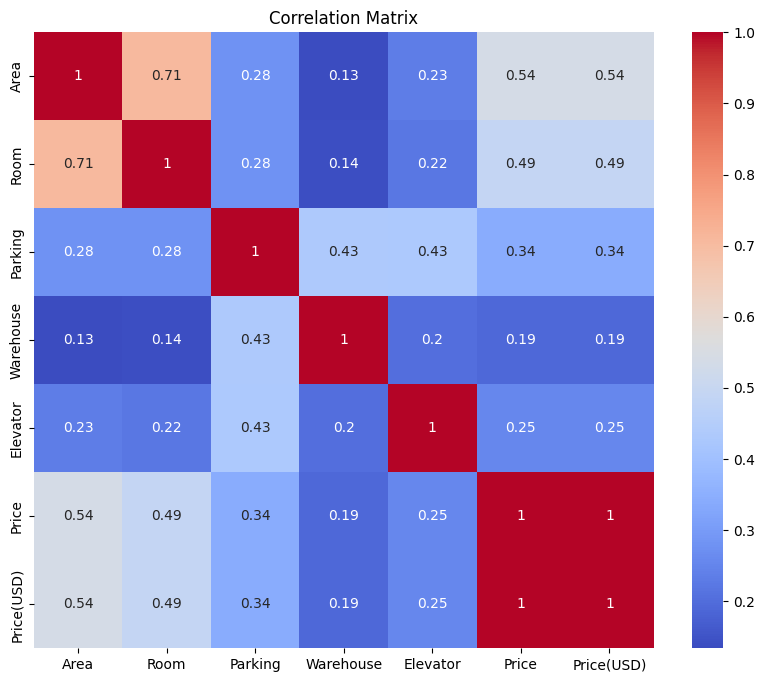

In [55]:
correlation_matrix_kendall = df_cleaned[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price', 'Price(USD)']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

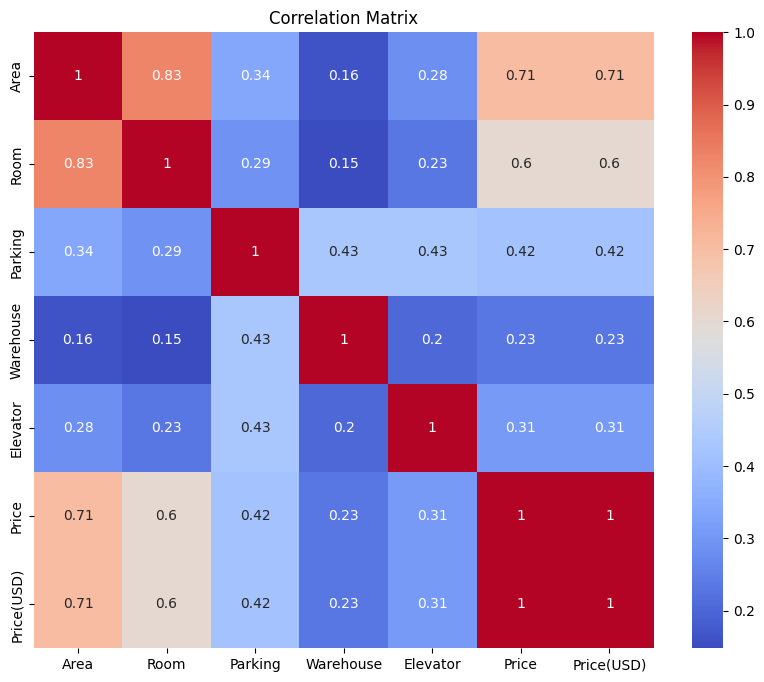

In [56]:
correlation_matrix_spearman = df_cleaned[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price', 'Price(USD)']].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

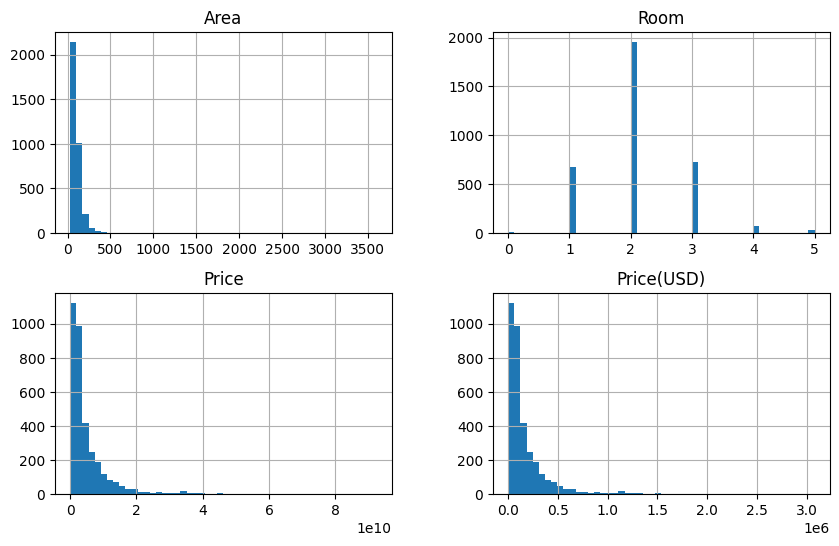

In [57]:
df_cleaned.hist(bins=50, figsize=(10,6))
plt.show()


In [74]:
numerical_columns = ['Area', 'Room', 'Price', 'Price(USD)']
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)

IQR = Q3 - Q1
df_cleaned = df_cleaned[~((df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Q1)
print(Q3)
print(IQR)
print(df_cleaned)

Area          6.900000e+01
Room          2.000000e+00
Price         1.416250e+09
Price(USD)    4.720833e+04
Name: 0.25, dtype: float64
Area          1.200000e+02
Room          2.000000e+00
Price         6.000000e+09
Price(USD)    2.000000e+05
Name: 0.75, dtype: float64
Area          5.100000e+01
Room          0.000000e+00
Price         4.583750e+09
Price(USD)    1.527917e+05
dtype: float64
      Area  Room  Parking  Warehouse  Elevator                     Address  \
2       79     2     True       True      True                      Pardis   
3       95     2     True       True      True               Shahrake Qods   
4      123     2     True       True      True              Shahrake Gharb   
5       70     2     True       True     False  North Program Organization   
6       87     2     True       True      True                      Pardis   
...    ...   ...      ...        ...       ...                         ...   
3470    86     2     True       True      True          South

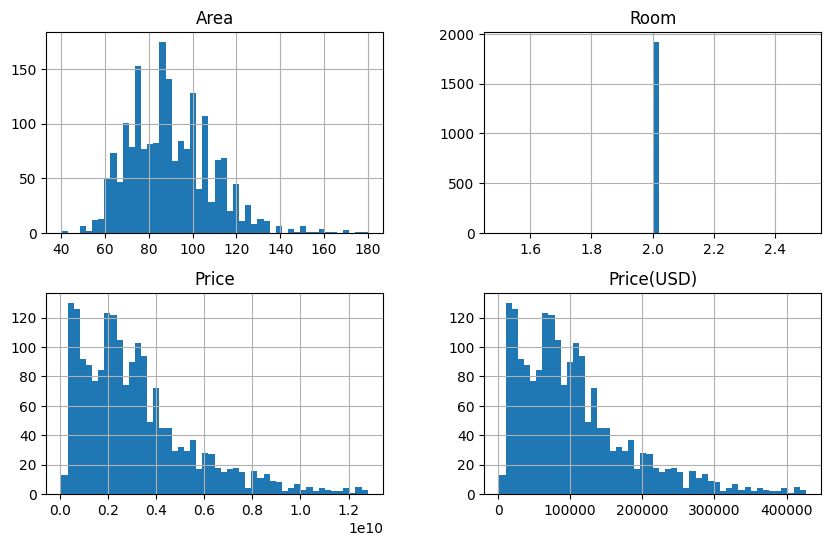

In [75]:
df_cleaned.hist(bins=50, figsize=(10,6))
plt.show()

## prepare Data

In [ ]:
from sklearn.model_selection import train_test_split
x = cleaned_df.drop(columns='Price(USD)')
y = cleaned_df['Price(USD)']

x = x.to_numpy()
y = y.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42) 


[[60 1 True True True 'Abbasabad']
 [55 1 True True True 'Punak']
 [62 2 True True False 'Punak']
 ...
 [145 2 True True True 'Gheitarieh']
 [84 3 True True True 'Andisheh']
 [145 5 False False False 'Jeyhoon']]
[ 82000.    91666.67  70000.   ... 400000.    53000.   166666.67]
[[67 2 True True True 'East Ferdows Boulevard']
 [150 3 True True True 'Farmanieh']
 [283 3 True True True 'Zaferanieh']
 ...
 [124 3 True True True 'Shahr-e-Ziba']
 [138 3 True True True 'Kahrizak']
 [63 1 True True True 'Punak']]
[  79333.33  333333.33  990000.     27666.67  266666.67   95000.
  100000.     65000.    160000.    281666.67  125000.    116666.67
  333333.33   24666.67 1088000.    185166.67  368666.67  111666.67
  218333.33   38333.33  108333.33  236666.67  833333.33   76666.67
   24333.33  262400.     66000.    251666.67  105000.   1850000.
  111666.67  416666.67   19000.     36666.67  120000.    156666.67
   51666.67 1916666.67  108000.    103333.33  115000.     98333.33
  150666.67   32000.     

In [60]:
columns = cleaned_df.drop(columns='Price(USD)').columns
train_df = pd.DataFrame(train_x, columns=columns)
test_df = pd.DataFrame(test_x, columns=columns)

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

std = StandardScaler()
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [62]:

numerical = ['Area', 'Room']
categorical = ['Address']
boolian = ['Parking', 'Warehouse', 'Elevator']

num_df = train_df[numerical]
cat_df = train_df[categorical]
bool_df = train_df[boolian]

num_df = std.fit_transform(num_df)
cat_df = oe.fit_transform(cat_df)
cat_df = cat_df.reshape(-1, 1)

bool_df = bool_df.to_numpy().astype(int)
train_df = np.concatenate([cat_df, num_df, bool_df], axis=1)

In [63]:

numerical = ['Area', 'Room']
categorical = ['Address']
boolian = ['Parking', 'Warehouse', 'Elevator']

num_df = test_df[numerical]
cat_df = test_df[categorical]
bool_df = test_df[boolian]

num_df = std.transform(num_df)

cat_df = oe.transform(cat_df)
cat_df = cat_df.reshape(-1, 1)

bool_df = bool_df.to_numpy().astype(int)
test_df = np.concatenate([cat_df, num_df, bool_df], axis=1)

In [64]:
train_y.dtype

dtype('float64')

# Predict Data

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_df, train_y)

LinearRegression()

In [66]:
lr.predict(train_df)

array([  7936.12333312, -12286.37396689, 114131.38952923, ...,
       218676.61015014, 302843.75384523, 559276.89576356])

In [67]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(train_y, lr.predict(train_df))

np.float64(211814.24127414118)

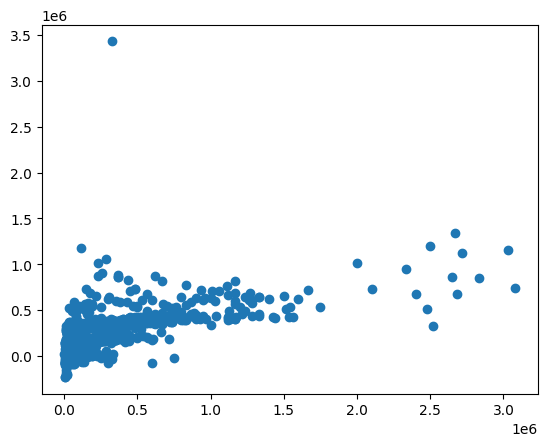

In [68]:
plt.scatter(train_y, lr.predict(train_df))

In [69]:
root_mean_squared_error(test_y, lr.predict(test_df))


np.float64(184098.74479046528)

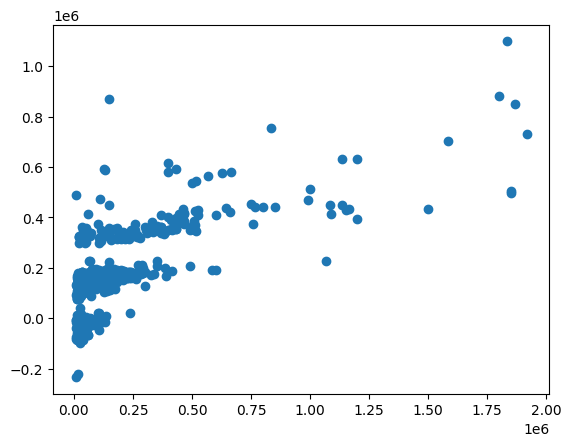

In [70]:
plt.scatter(test_y, lr.predict(test_df))


In [71]:
from sklearn.metrics import r2_score
r2_score(test_y, lr.predict(test_df))

0.4747547408168985

In [72]:
from scipy import stats
from scipy.stats import t
confidence = 0.95
se = (test_y - lr.predict(test_df)) ** 2
t.interval(0.95, len(se - 1), loc=se.mean(), scale=stats.sem(se))

(np.float64(22889824825.0663), np.float64(44894870841.78343))